<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/pytorch_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

$$\textbf{Pytorch Day 1}$$

---

# 1. $\textbf{Tensor Basics}$
---

<br>

### $\textbf{But Why Tensors and not arrays or dataframes ?}$


While NumPy arrays and Pandas dataframes has been useful for numerical computations and data manipulation, PyTorch tensors offer several advantages for machine learning, especially in deep learning while training neural networks:

#### GPU Acceleration:
- **Tensors**: PyTorch tensors can be easily transferred to GPUs, enabling faster computations crucial for training large neural networks.
- **NumPy Arrays/Pandas DataFrames**: Primarily designed for CPU operations. GPU support via libraries like CuPy is less seamless than in PyTorch.

#### - Automatic Differentiation:
- **Tensors**: PyTorch's `autograd` package works with tensors to automatically compute gradients, essential for backpropagation in neural network training.
- **NumPy Arrays/Pandas DataFrames**: Do not inherently support automatic differentiation, making manual gradient calculations cumbersome and error-prone.

<br>

In [1]:
import torch

import random
random.seed(1) #for reprodicibility

## $\textbf{1.1 Tensor Creation}$

### $\text{1.1.1 Empty Tensors}$


In [2]:
x = torch.empty(1)
print(x)

tensor([2.0622e-19])


$\text{This empty tensor means it will intialize an empty tensor, basically a garbage value}$

In [3]:
x = torch.empty(3)
print(x)

tensor([ 2.2822e-05,  3.2802e-41, -1.7301e+28])


<br>


$\textbf{Lets make multidimensional tensor}$

In [4]:
x = torch.empty(3, 4)
print(x)

tensor([[ 0.0000e+00,  0.0000e+00,  2.3028e-05,  3.2802e-41],
        [ 4.1439e-06,  3.2802e-41, -1.1831e+38,  4.3471e-41],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [5]:
x = torch.empty(2, 3, 4)
print(x)

tensor([[[ 2.3036e-05,  3.2802e-41,  2.3040e-05,  3.2802e-41],
         [ 1.1210e-43,  0.0000e+00,  8.9683e-44,  0.0000e+00],
         [-1.7961e-38,  3.2809e-41,  2.1707e-18,  4.5447e+30]],

        [[ 7.0062e+22,  2.1715e-18,  4.5447e+30,  7.0062e+22],
         [ 2.1707e-18,  1.9284e+31,  3.2314e-18,  1.8692e+20],
         [ 2.0179e-43,  0.0000e+00,  1.7937e-43,  0.0000e+00]]])


### $\text{1.1.2 Tensors of zeros}$

In [6]:
y = torch.zeros(3)
print(y)

tensor([0., 0., 0.])


In [7]:
y = torch.zeros(3,4)
print(y)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [8]:
y = torch.zeros(2,3,4)
print(y)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


###  $\text{1.1.3 Tensor of ones and torch dtypes}$

In [9]:
z = torch.ones(3)
print(z)

tensor([1., 1., 1.])


In [10]:
print(z.dtype)

torch.float32


$\text{By default, The datatype inside the tensors are float 32.}$



In [11]:
print(y.dtype)

torch.float32


$\text{You can see the same with tensor of zeros as well. But, We can change this}$

**Pass:** `dtype=torch.datatype`



In [12]:
z = torch.ones(3, dtype=torch.int32)
print(z)

tensor([1, 1, 1], dtype=torch.int32)


In [13]:
z = torch.ones(3, dtype=torch.double)
print(z)

tensor([1., 1., 1.], dtype=torch.float64)


In [14]:
z = torch.ones(3, dtype=torch.float32)
print(z)

tensor([1., 1., 1.])


### $\text{1.1.4 size()}$

In [15]:
z = torch.ones(3, dtype=torch.double)
print(z)

tensor([1., 1., 1.], dtype=torch.float64)


In [16]:
z.size

<function Tensor.size>

 size$\text{ does not work the was in pandas but here you write it a method like }$ `z.size()`

In [17]:
z.size()

torch.Size([3])

In [18]:
z = torch.ones(5, 3, dtype=torch.double)
z.size()

torch.Size([5, 3])

### 1.1.5 $\text{Creating Tensor for Data}$

In [19]:
list_data = [1,2,3,4]
tensor_data = torch.tensor(list_data, dtype=torch.float16) # Note: You can change type of data as well when you are converting
print(tensor_data)

tensor([1., 2., 3., 4.], dtype=torch.float16)


## $\textbf{1.2 Tensor Operations}$

#### $\text{1.2.1 Addition of Tensors}$

In [20]:
x = torch.rand(2,2) # rand create a random tensor
y = torch.ones(2,2, dtype=torch.int16) # creates a tensor of 1's

print(x)
print(y)

tensor([[0.4623, 0.7468],
        [0.6805, 0.6214]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int16)


In [21]:
z = x+y
print(z)

tensor([[1.4623, 1.7468],
        [1.6805, 1.6214]])


In [22]:
z = torch.add(x,y)
print(z)

tensor([[1.4623, 1.7468],
        [1.6805, 1.6214]])


$\text{Inplace Addition}$

In [23]:
x.add_(y)
print(x)

tensor([[1.4623, 1.7468],
        [1.6805, 1.6214]])


#### $\text{1.2.2 Substraction of Tesors}$

In [24]:
x = torch.rand(2,2) # rand create a random tensor
y = torch.ones(2,2, dtype=torch.int16) # creates a tensor of 1's

print(x)
print(y)

tensor([[0.8406, 0.1513],
        [0.3079, 0.8812]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int16)


In [25]:
z = x-y
print(z)

tensor([[-0.1594, -0.8487],
        [-0.6921, -0.1188]])


In [26]:
z = torch.sub(x,y)
print(z)

tensor([[-0.1594, -0.8487],
        [-0.6921, -0.1188]])


In [27]:
x.sub_(y)
print(x)

tensor([[-0.1594, -0.8487],
        [-0.6921, -0.1188]])


### $\text{1.2.3 ElementWise Product of Tesors}$

In [28]:
x = torch.rand(2,2) # rand create a random tensor
y = torch.ones(2,2, dtype=torch.int16) # creates a tensor of 1's

print(x)
print(y)

tensor([[0.9857, 0.0098],
        [0.2819, 0.5824]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int16)


In [29]:
z=x*y
print(z)

tensor([[0.9857, 0.0098],
        [0.2819, 0.5824]])


In [30]:
z = torch.mul(x,y)
print(z)

tensor([[0.9857, 0.0098],
        [0.2819, 0.5824]])


In [31]:
x.mul_(y)
print(x)

tensor([[0.9857, 0.0098],
        [0.2819, 0.5824]])


### 1.2.4 $\text{ElementWise Divsion of Tensors}$

In [32]:
x = torch.rand(2,2) # rand create a random tensor
y = torch.ones(2,2, dtype=torch.int16) # creates a tensor of 1's

print(x)
print(y)

tensor([[0.2207, 0.1528],
        [0.9436, 0.0060]])
tensor([[1, 1],
        [1, 1]], dtype=torch.int16)


In [33]:
z = x/y
print(z)

tensor([[0.2207, 0.1528],
        [0.9436, 0.0060]])


In [34]:
z = torch.div(x,y)
print(z)

tensor([[0.2207, 0.1528],
        [0.9436, 0.0060]])


## $\textbf{1.3 Slicing in Tensors}$

In [35]:
x = torch.rand(5)
print(x)

tensor([0.8752, 0.1724, 0.4519, 0.5746, 0.4273])


In [36]:
x[2:]

tensor([0.4519, 0.5746, 0.4273])

In [37]:
x[:4]

tensor([0.8752, 0.1724, 0.4519, 0.5746])

$\textbf{Slicing a Multi-Dimensonal Tensors}$

In [38]:
x = torch.rand(4,5)
print(x)

tensor([[0.5295, 0.9874, 0.7660, 0.1589, 0.6280],
        [0.8519, 0.7746, 0.8532, 0.2962, 0.1509],
        [0.2955, 0.0214, 0.8900, 0.9579, 0.4471],
        [0.7956, 0.1842, 0.0143, 0.4976, 0.8358]])


In [39]:
x[1:,:3]

tensor([[0.8519, 0.7746, 0.8532],
        [0.2955, 0.0214, 0.8900],
        [0.7956, 0.1842, 0.0143]])

In [40]:
x[2:4,3:5]

tensor([[0.9579, 0.4471],
        [0.4976, 0.8358]])

#### $\text{1.3.1 Indexing in tensor}$

In [41]:
x[0,0]

tensor(0.5295)

$\textbf{Getting the item at indexed element}$

In [42]:
x[0,0].item()

0.5294895768165588

## $\textbf{1.4 Resize a Tensor}$

In [43]:
x = torch.rand(4,4)
print(x)

tensor([[0.1825, 0.7086, 0.2069, 0.7937],
        [0.3618, 0.5445, 0.1997, 0.6555],
        [0.8051, 0.8078, 0.0491, 0.7145],
        [0.5684, 0.2749, 0.6999, 0.8240]])


In [44]:
y = x.view(16)
y

tensor([0.1825, 0.7086, 0.2069, 0.7937, 0.3618, 0.5445, 0.1997, 0.6555, 0.8051,
        0.8078, 0.0491, 0.7145, 0.5684, 0.2749, 0.6999, 0.8240])

In [45]:
y = x.view(-1,2) # -1 gives it the required value for reshaping
print(y)

tensor([[0.1825, 0.7086],
        [0.2069, 0.7937],
        [0.3618, 0.5445],
        [0.1997, 0.6555],
        [0.8051, 0.8078],
        [0.0491, 0.7145],
        [0.5684, 0.2749],
        [0.6999, 0.8240]])


## $\textbf{1.5 Numpy <=> Tensor}$

### $\text{1.5.1 Numpy => Tensor}$

In [46]:
import torch
import numpy as np

In [47]:
x = torch.rand(5)
print(x)
print(type(x))

tensor([0.7177, 0.2496, 0.2646, 0.3861, 0.4033])
<class 'torch.Tensor'>


In [48]:
p = x.numpy()
print(p)
print(type(p))

[0.7177494  0.2496109  0.2646472  0.38606107 0.40329653]
<class 'numpy.ndarray'>


$\textbf{Caution !}$

$\text{Since, our tensor is on CPU and not GPU, both object x and p shares same memory location, then changing one will change other.}$

In [49]:
x.add_(1)
print(x)

tensor([1.7177, 1.2496, 1.2646, 1.3861, 1.4033])


In [50]:
print(p)

[1.7177494 1.2496109 1.2646472 1.3860611 1.4032965]


$\text{Notice that: Changing 'x' also changed 'p' because they are sharing same memory location}$

### $\textbf{1.5.2 Numpy <= Tensor}$

In [51]:
a = np.random.randn(5)
print(a)
print(type(a))

[ 0.13097374  0.21559439  0.3028324  -1.40084626  0.25022173]
<class 'numpy.ndarray'>


In [52]:
x = torch.from_numpy(a)
print(x)
print(type(x))

tensor([ 0.1310,  0.2156,  0.3028, -1.4008,  0.2502], dtype=torch.float64)
<class 'torch.Tensor'>


### Note: Changing dtype of a tensor

In [53]:
print("Before:")
print(x)
x=x.to(dtype=torch.float16)
print("\nAfter:")
print(x)

Before:
tensor([ 0.1310,  0.2156,  0.3028, -1.4008,  0.2502], dtype=torch.float64)

After:
tensor([ 0.1310,  0.2156,  0.3027, -1.4004,  0.2502], dtype=torch.float16)


## $\textbf{1.6 Creating Tensors on CUDA GPU}$

In [54]:
torch.cuda.is_available()

False

In [55]:
if torch.cuda.is_available():
  device = torch.device("cuda")
  # create directly on GPU
  x = torch.ones(5, device = device)
  # create on cpu then move to GPU
  y = torch.zeros(5)
  y = y.to(device=device)
  z = x+y
  z.numpy() #this will give error coz numpy can handle only cpu tensor

In [56]:
if torch.cuda.is_available():
  device = torch.device("cuda")

  x = torch.ones(5, device = device)
  y = torch.zeros(5)
  y = y.to(device=device)

  z = x+y
  print(z)
  z = z.to(device=torch.device("cpu"))
  print(z)
  z = z.numpy()
  print(z)

# $\textbf{2. AutoGrad in Pytorch}$
---

<br>

PyTorch's $\textbf{autograd}$ it is a tool that automatically calculates the gradients needed in the backpropagation step of learning models, particularly neural networks.

- It works by creating a $\textbf{dynamic computational graph}$ as you perform operations, which makes it very flexible and easy to debug.

- To use autograd, you simply set **`requires_grad=True`** on the tensors you want to track. When you perform operations on these tensors, PyTorch keeps track of them. Later, you can call the $\textbf{backward()}$ method on the final result to compute the gradients, which will be stored in the $\textbf{.grad}$ attribute of the original tensors.

<br>

$\text{What is a computational graph?}$

 A computational graph is a dynamic representation of the operations (like addition, multiplication, etc.)  performed on tensors during the forward pass of a neural network.
- a computational graph is typically represented as a $\text{Directed Acyclic Graph (DAG)}$
- In PyTorch, computational graphs are dynamic, meaning they are constructed dynamically as operations are performed during the execution of the forward pass.


In [57]:
import torch

In [58]:
x = torch.randn(3)
print(x)

tensor([0.1310, 1.2753, 1.2180])


$\text{Now suppose, Later sometime we will need to create the gradient of some function wrt. x, which we will do often while doing backprop while training a neural network.}$
$\text{For that we specify the argument }$**`requires_grad=True`**

<br>

In [59]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 0.3207, -0.0569, -1.6511], requires_grad=True)


$\text{Since we have enabled gradient calculation. Now, whenever we do any operation with tenor 'x' pytorch will create a computational graph for us.}$

<br>

In [60]:
y = x+2
print(y)

tensor([2.3207, 1.9431, 0.3489], grad_fn=<AddBackward0>)




 $\textbf{Note:}$ The $\text{<AddBackward0>}$ indicates that the operation was **addition** and the $\textbf{grad_fn}$ signifies that gradients can be computed for this tensor during backpropagation.

 <br>



In [61]:
z = x*y
print(z)

tensor([ 0.7441, -0.1106, -0.5760], grad_fn=<MulBackward0>)


In [62]:

w = z.sum()
print(w)

tensor(0.0575, grad_fn=<SumBackward0>)


## $\textbf{2.2 Visualizing Computation Graph in PyTorch}$

In [63]:

!pip install torchviz -q # adding -q for quiet installation you can do without it aswell

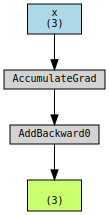

In [64]:
from torchviz import make_dot

make_dot(y, params={"x": x})

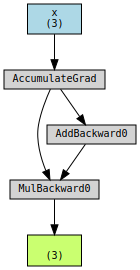

In [65]:
from torchviz import make_dot

make_dot(z, params={"x": x, 'y':y})

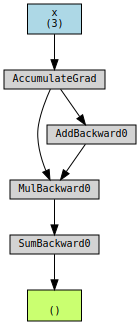

In [66]:
from torchviz import make_dot

make_dot(w, params={"x": x, 'y':y, 'z':z})

## $\text{2.3 Gradient Calculation}$

In [67]:

# Perform backpropagation
w.backward()

# Access the gradients of x
print(x.grad)

tensor([ 2.6413,  1.8862, -1.3022])


<br>
Calling $\textbf{w.backward()}$ performs backpropagation to compute gradients of the tensor $\textbf{w}$ with respect to the $\textbf{leaf tensors}$ in the computational graph.

<br>
**Important Note:**

PyTorch clears intermediate values of the computational graph by default after calling $\textbf{backward()}$ to free up memory.
- So, what happen if you try to do backprop again.
 - You will get error.

<br>

### $\text{2.3.1 Retaining Gradients after Backprop}$

In [68]:

# Perform backpropagation
w.backward()

# Access the gradients of x
print(x.grad)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

So, If you need to perform multiple backward passes or access intermediate values of the graph after calling backward(), you should set **`retain_graph=True.`**

In [69]:
x = torch.randn(5, requires_grad=True)
y = x+2
z = x*y
w = z.sum()
w

tensor(5.1609, grad_fn=<SumBackward0>)

In [70]:
w.backward(retain_graph=True)
print(x.grad)

tensor([-0.9094, -0.3271,  0.4224,  6.2061,  1.0076])


Setting ***`retain_graph=True`*** ensures that the computational graph is retained after the backward pass, allowing for multiple subsequent backward passes without needing to recompute the graph.

<br>

$\text{Lets do the backprop again}$

In [71]:
w.backward(retain_graph=True)
print(x.grad)

tensor([-1.8188, -0.6543,  0.8448, 12.4123,  2.0151])


### $\text{2.3.2 Getting Gradient of non-leaf tensors}$

In [72]:
y.grad

<ipython-input-72-10b3a7061f6d>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  y.grad


The warning message you encountered indicates that you're trying to access the **`.grad`** attribute of a $\text{non-leaf tensor }$  **(`y`)**.

- By default, gradients of non-leaf tensors are not computed during the backward pass to save memory.

- If you indeed want to compute gradients for a non-leaf tensor, you should call **`.retain_grad()`** on that tensor $\text{before performing the backward pass.}$



In [73]:
y.retain_grad()
z.retain_grad()

w.backward(retain_graph=True)


print(x.grad)
print(y.grad)
print(z.grad)

tensor([-2.7282, -0.9814,  1.2672, 18.6184,  3.0227])
tensor([-1.4547, -1.1636, -0.7888,  2.1031, -0.4962])
tensor([1., 1., 1., 1., 1.])


$\text{These gradients represent the sensitivity of the output 'w' to changes in each element of the respective tensors during backpropagation.}$

Now you can calcualte

In [74]:
w.backward(retain_graph=True)
print("Gradient of x:", x.grad)
print("Gradient of y:", y.grad)
print("Gradient of z:", z.grad)

Gradient of x: tensor([-3.6376, -1.3085,  1.6895, 24.8245,  4.0302])
Gradient of y: tensor([-2.9094, -2.3271, -1.5776,  4.2061, -0.9924])
Gradient of z: tensor([2., 2., 2., 2., 2.])


### $\text{2.3.2 Prevent Gradient Tracking}$

- **`x.requires_grad_(False)`**
- **`x.detach()`**
- **`with torch.no_grad()`**

In [75]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([-1.1187, -0.5570,  0.9134], requires_grad=True)


In [76]:

x.requires_grad_(False) #modifies x inplace
print(x)

tensor([-1.1187, -0.5570,  0.9134])


In [77]:
x = torch.randn(3, requires_grad=True)
print(x)

tensor([ 0.4214,  1.3262, -0.4106], requires_grad=True)


In [78]:
y =x.detach()
print(y)

tensor([ 0.4214,  1.3262, -0.4106])


In [79]:
print(x)
with torch.no_grad():
  y = x + 2
  print(y)
  print(x)

tensor([ 0.4214,  1.3262, -0.4106], requires_grad=True)
tensor([2.4214, 3.3262, 1.5894])
tensor([ 0.4214,  1.3262, -0.4106], requires_grad=True)


**Note:** Only operation on $x$ has been detached from gradient. $x$ still has gradient

<br>

### $\text{2.3.4 Gradient Accumulation}$

Gradient accumulation involves accumulating gradients across multiple batches before updating the model parameters.

- Instead of updating the parameters after processing each batch, gradients from each batch are added together over a certain number of batches or accumulation steps.
- Once a sufficient number of gradients have been accumulated, the model parameters are updated based on the accumulated gradients.


In [80]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(1):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])


In [81]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])


In [82]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
